# **Programming For AI - Lab 6/7/8**

**Task 1:**

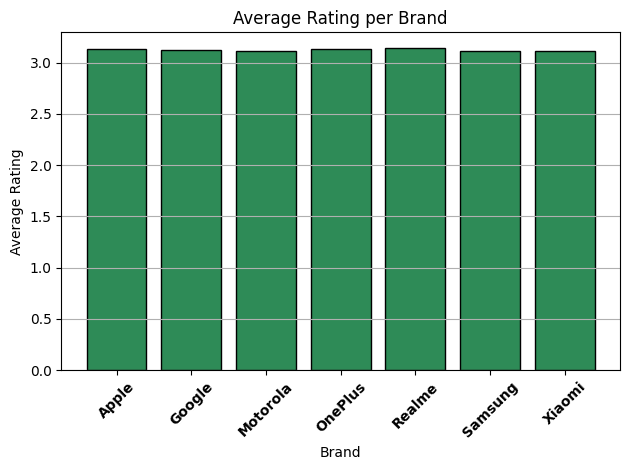

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("mobile_reviews_sentiment.csv")

avg = df.groupby("brand")["rating"].mean()

plt.bar(avg.index, avg.values, color='seagreen', edgecolor='black')
plt.grid(axis='y', linestyle='-')  
plt.xlabel("Brand")
plt.ylabel("Average Rating")
plt.title("Average Rating per Brand")
plt.xticks(rotation=45, fontweight='bold')
plt.tight_layout()
plt.show()

**Task 2:**

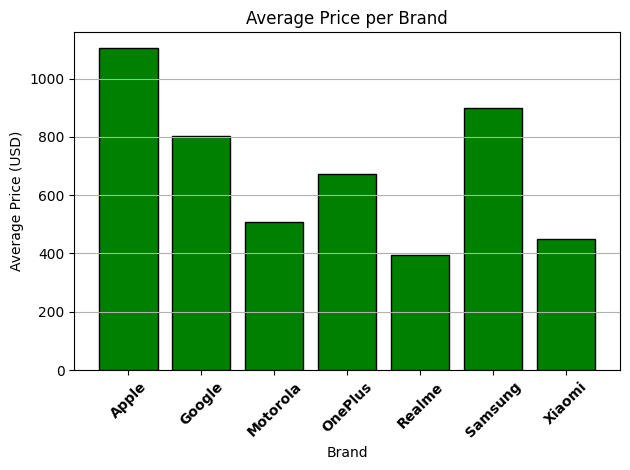

In [8]:
avg_price = df.groupby("brand")["price_usd"].mean()

plt.bar(avg_price.index, avg_price.values, color='green', edgecolor='black')
plt.grid(axis='y', linestyle='-')
plt.xlabel("Brand")
plt.ylabel("Average Price (USD)")
plt.title("Average Price per Brand")
plt.xticks(rotation=45, fontweight='bold')
plt.tight_layout()
plt.show()

**Task 3:**

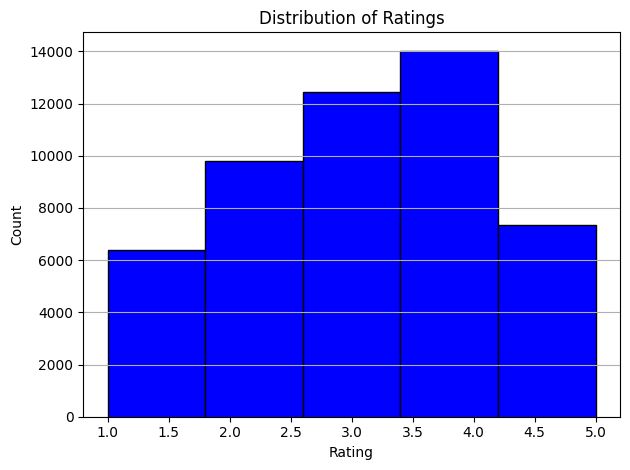

In [12]:
plt.hist(df["rating"], bins=5, color='blue', edgecolor='black')
plt.grid(axis='y', linestyle='-')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.tight_layout()
plt.show()

**Task 4:**

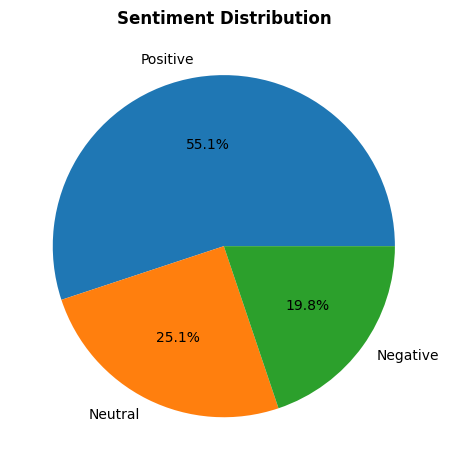

In [17]:

sent_counts = df["sentiment"].value_counts()

plt.pie(sent_counts.values, labels=sent_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Distribution", fontweight='bold')
plt.tight_layout()
plt.show()

**Task 5:**

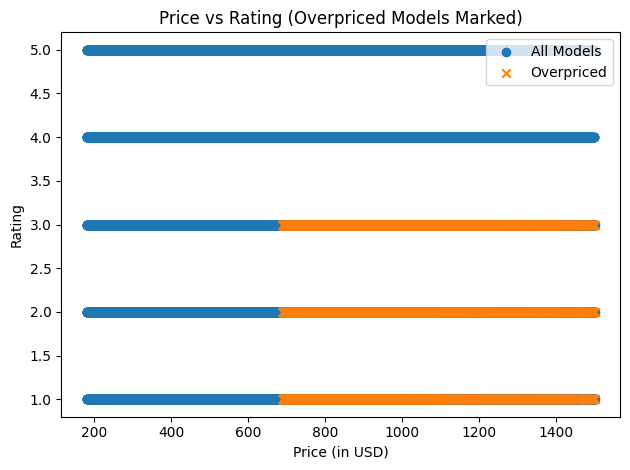

In [20]:
mean_price = df["price_usd"].mean()
mean_rating = df["rating"].mean()

overpriced = df[(df["price_usd"] > mean_price) & (df["rating"] < mean_rating)]

plt.scatter(df["price_usd"], df["rating"], label="All Models", marker='o')
plt.scatter(overpriced["price_usd"], overpriced["rating"], label="Overpriced", marker='x')
plt.xlabel("Price (in USD)")
plt.ylabel("Rating")
plt.title("Price vs Rating (Overpriced Models Marked)")
plt.legend()
plt.tight_layout()
plt.show()

**Task 6:**

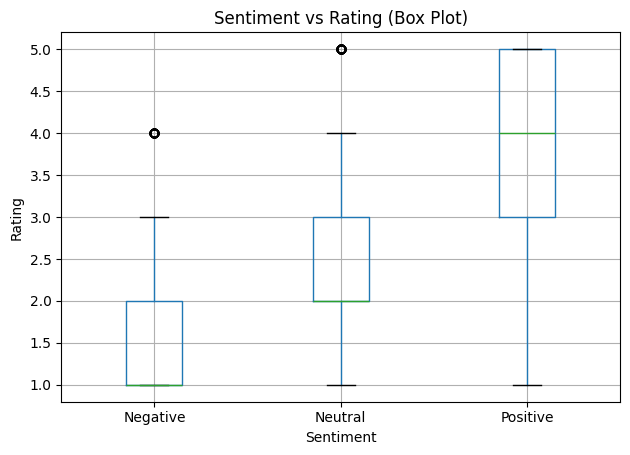

In [23]:
df.boxplot(column="rating", by="sentiment")

plt.xlabel("Sentiment")
plt.ylabel("Rating")
plt.title("Sentiment vs Rating (Box Plot)")
plt.suptitle("")
plt.tight_layout()
plt.show()

**Task 7:**

In [4]:
df = pd.read_csv("software_houses_pk.csv")

*Part (a)*

In [28]:
df = df[['Company Name', 'City']]
df = df.dropna(subset=['City'])

df['City'] = df['City'].str.strip().str.title()
city_counts = df['City'].value_counts()
print(city_counts)

City
Islamabad         225
Karachi           217
Lahore            138
Faisalabad         35
Rawalpindi         26
Quetta             17
Sialkot            13
Gujranwala          4
Hyderabad           4
Multan              4
Talagang            2
Bahawalpur          2
Jhelum              2
Peshawar            2
Rahimyar Khan       2
Abbottabad          2
Dera Bugti          1
Alipur Chattha      1
Sargodha            1
Name: count, dtype: int64


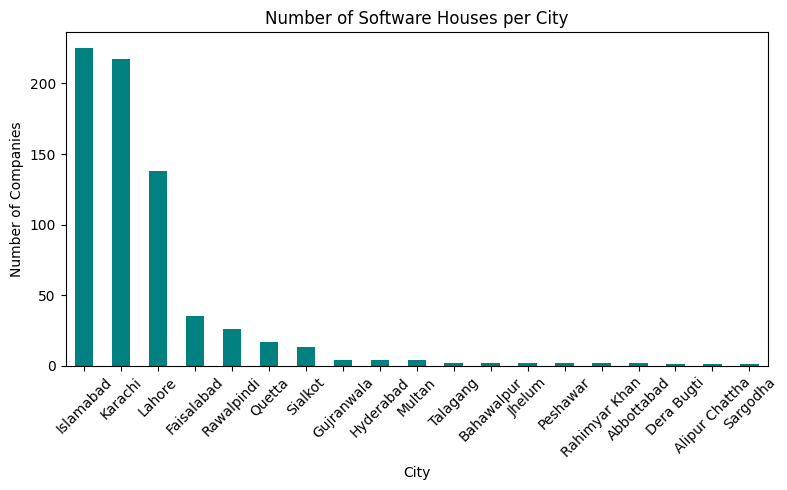

In [31]:
plt.figure(figsize=(8,5))
city_counts.plot(kind='bar', color='teal')
plt.title("Number of Software Houses per City")
plt.xlabel("City")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*Part (b)*

In [7]:
df = df[['City', 'Services']]
df = df[df['Services'].notna() & (df['Services'] != '-')]

df['Services'] = df['Services'].str.lower()

industry_map = {
    'finance': 'Finance',
    'bank': 'Finance',
    'erp': 'Enterprise',
    'health': 'Healthcare',
    'hospital': 'Healthcare',
    'ecommerce': 'E-commerce',
    'online store': 'E-commerce',
    'education': 'Education',
    'web development': 'Web / Dev',
    'web design': 'Web / Dev',
    'digital marketing': 'Marketing',
    'seo': 'Marketing',
    'cybersecurity': 'IT / Security',
    'it support': 'IT / Security',
    'cloud': 'IT / Security'
}

def get_industry(service_text):
    for keyword, industry in industry_map.items():
        if keyword in service_text:
            return industry
    return 'Other'

df['Industry'] = df['Services'].apply(get_industry)

industry_counts = df['Industry'].value_counts()
print(industry_counts)


Industry
Other            309
Web / Dev        181
Marketing         43
IT / Security     28
Enterprise        24
E-commerce        15
Healthcare         6
Finance            3
Education          1
Name: count, dtype: int64


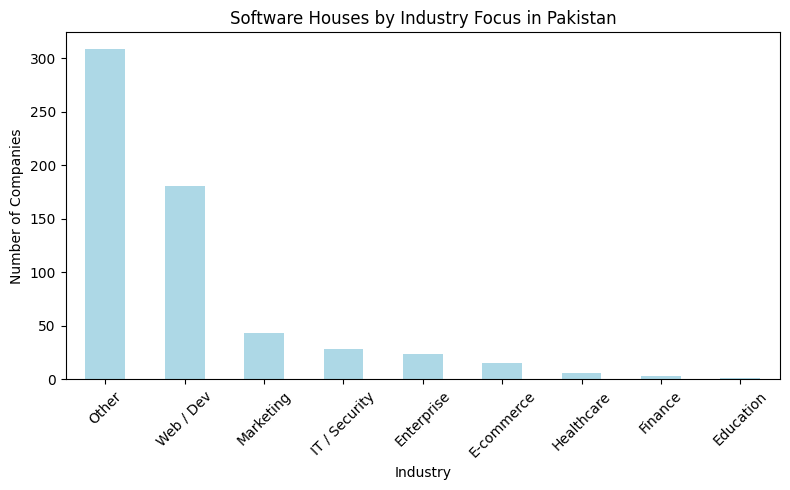

In [11]:
plt.figure(figsize=(8,5))
industry_counts.plot(kind='bar', color='lightblue')
plt.title("Software Houses by Industry Focus in Pakistan")
plt.xlabel("Industry")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Part (c)*

In [14]:
df = pd.read_csv("software_houses_pk.csv")
df = df[['Services']].dropna()
df = df[df['Services'] != '-']

df['Services'] = df['Services'].str.lower()

tech_keywords = ['php','wordpress','html','css','javascript','python','java','c#','flutter','react','android','ios','ai','machine learning','cloud','mysql','sql','node']

def extract_techs(text):
    return [tech for tech in tech_keywords if tech in text]

df['Techs'] = df['Services'].apply(extract_techs)
all_techs = df['Techs'].explode()
tech_counts = all_techs.value_counts()
print(tech_counts)

Techs
cloud               32
ai                  29
android             21
php                 16
wordpress           11
ios                  7
node                 5
react                4
java                 3
machine learning     3
flutter              2
c#                   1
Name: count, dtype: int64


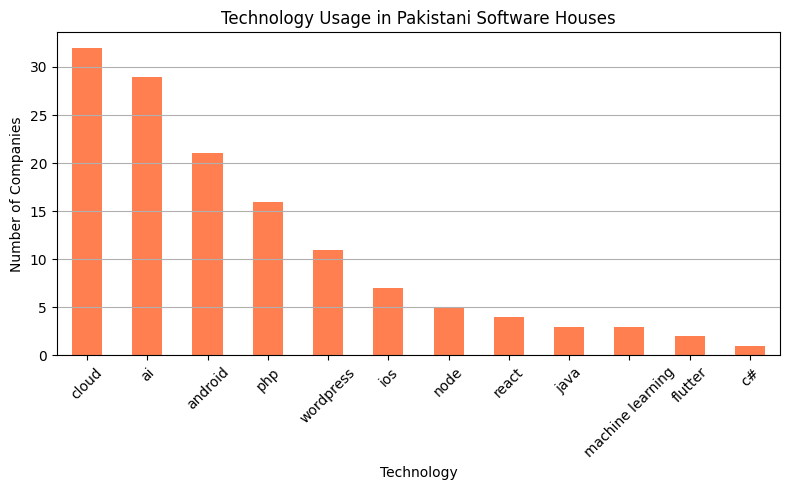

In [15]:
plt.figure(figsize=(8,5))
tech_counts.plot(kind='bar', color='coral')
plt.title("Technology Usage in Pakistani Software Houses")
plt.xlabel("Technology")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-')
plt.tight_layout()
plt.show()